<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***
# Exercises
Do your work for this exercise in a jupyter notebook named `modeling` within the `regression-exercises` repo. Add, commit, and push your work.

# Index:
|SECTION:|DESCRIPTION:|
|:---|:---|
|[__--1--__](#1)| **Select a dataset with a continuous target variable**|
|[__--2--__](#2)| **Be sure your data is prpared (no missing values, numeric datatypes) and split into samples**|
|[__a. Columns__](#COLUMNS)|**Adjust colomn names for easier understanding and manipulation**|
|[__--3--__](#3)|**Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.**|
|[__Notes:__](#NOTES)|**Regularization, with Towards Data Science link. TweedieRegressor information sklearn v0.23 update**|

In [ ]:
# import numpy, pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# imports from sklearn
from sklearn.feature_selection import f_regression, RFE, RFECV
from sklearn.linear_model import LassoLars, LassoLarsCV, LinearRegression, TweedieRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
from sklearn.datasets import load_boston

In [177]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Apparently we do not load Boston...
#  - 'The Boston housing prices dataset has an ethical problem.'
# load_boston()

from sklearn.datasets import fetch_california_housing
    

In [9]:
housing = fetch_california_housing(as_frame=True)

<a id="1"> </a>
<div class="alert alert-block alert-info">
</div>

***
### 1. Select a dataset with a continuous target variable.

[__--TOP--__](#TOP)

In [15]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
df = housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<a id="2"> </a>
<div class="alert alert-block alert-info">
</div>

***

### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.
___
[__--TOP--__](#TOP)

<a id="COLUMNS"></a>
### Rename Columns
1. Make names lowercase, use underscores between words, rename for understanding
2. Set X_cols and y_col for modeling
3. Split data into Train, Validate, and Test groups
4. Move on to EDA

In [22]:
cols = []
for i in df:
    i = i.lower()
    cols.append(i)
cols

['medinc',
 'houseage',
 'averooms',
 'avebedrms',
 'population',
 'aveoccup',
 'latitude',
 'longitude',
 'medhouseval']

In [23]:
df.columns= ['income',
 'house_age',
 'rooms',
 'bedrooms',
 'population',
 'occupancy',
 'latitude',
 'longitude',
 'value']

In [30]:
for i in df:
    print(df[i].value_counts(dropna=False))

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: income, Length: 12928, dtype: int64
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: house_age, dtype: int64
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286

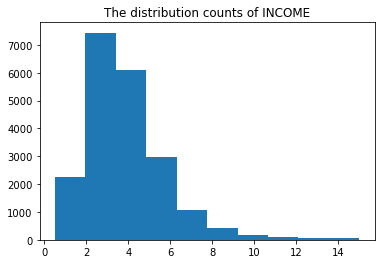

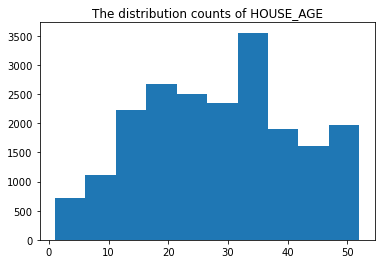

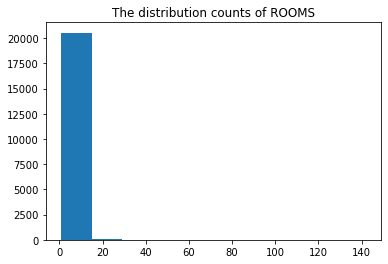

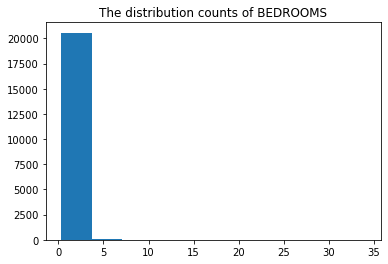

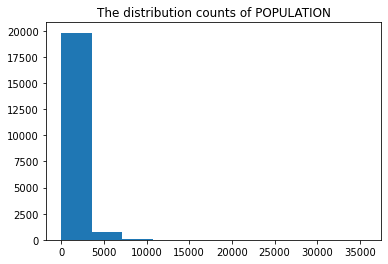

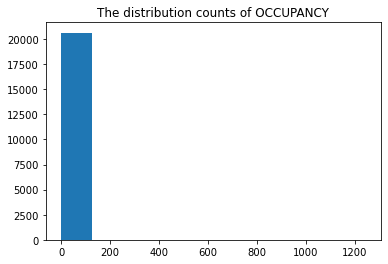

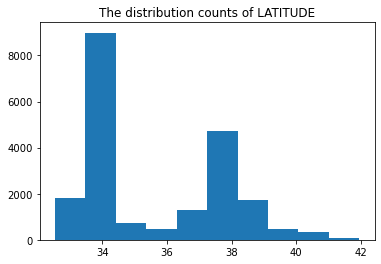

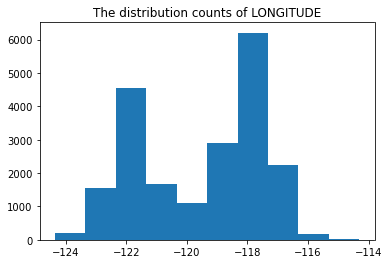

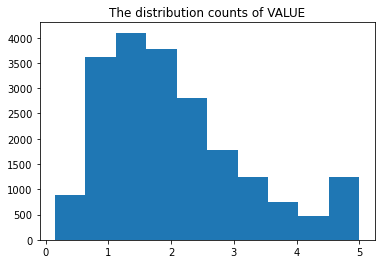

In [35]:
for i in df:
    plt.hist(x=df[i]
    )
    plt.title(f"The distribution counts of {i.upper()}")
    plt.show()

In [36]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [38]:
df = remove_outliers(df, 1.5, X_cols )
df

Number of observations removed: 3798


/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_48784/2749255196.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['outlier'], inplace=True)


,income,house_age,rooms,bedrooms,population,occupancy,latitude,longitude,value
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


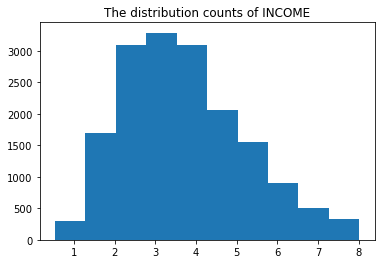

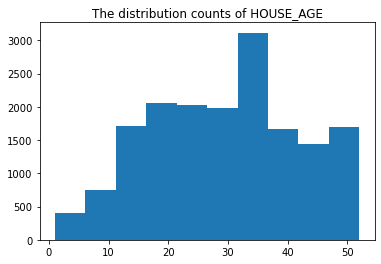

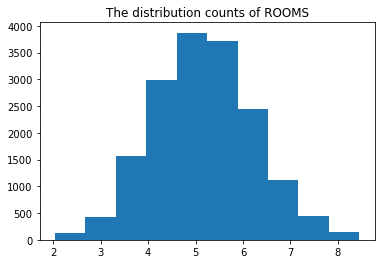

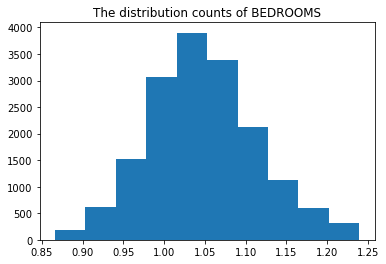

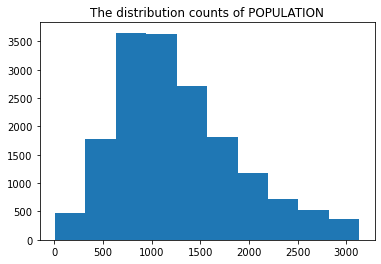

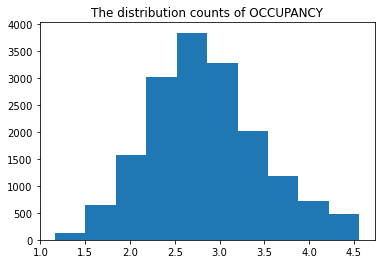

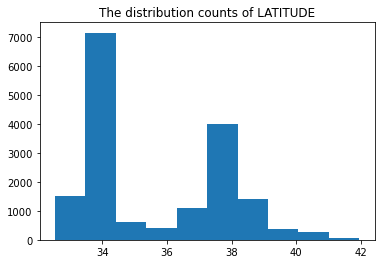

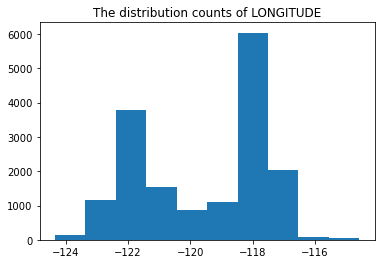

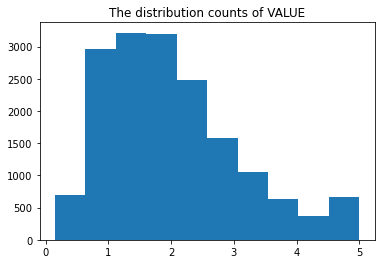

In [39]:
for i in df:
    plt.hist(x=df[i]
    )
    plt.title(f"The distribution counts of {i.upper()}")
    plt.show()

(array([ 330., 2311., 2478., 2992., 2403., 2030., 1420.,  847.,  733.,
         405.,  277.,  616.]),
 array([0.14999   , 0.55415833, 0.95832667, 1.362495  , 1.76666333,
        2.17083167, 2.575     , 2.97916833, 3.38333667, 3.787505  ,
        4.19167333, 4.59584167, 5.00001   ]),
 <BarContainer object of 12 artists>)

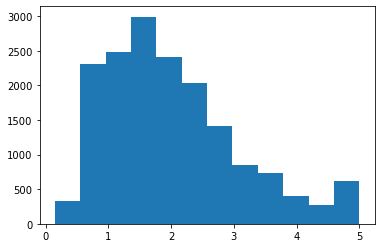

In [52]:
plt.hist(df.value, bins=12)

In [54]:
df['value_bins'] = pd.qcut(df.value, q=10)

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_48784/1761473371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_bins'] = pd.qcut(df.value, q=10)


In [40]:
import seaborn as sns

In [66]:
fiftythoubins = pd.cut(df.value, bins=[0,.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
df['fiftythoubins'] = fiftythoubins

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_48784/650445957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fiftythoubins'] = fiftythoubins


In [67]:
df.fiftythoubins.value_counts(dropna=False)

(1.5, 2.0]    3596
(1.0, 1.5]    3114
(0.5, 1.0]    2837
(2.0, 2.5]    2593
(2.5, 3.0]    1736
(3.0, 3.5]    1086
(3.5, 4.0]     689
(5.0, 5.5]     449
(4.0, 4.5]     387
(4.5, 5.0]     216
(0.0, 0.5]     139
Name: fiftythoubins, dtype: int64

In [57]:
df.value_bins.value_counts()

(1.352, 1.589]    1690
(1.073, 1.352]    1686
(2.399, 2.808]    1686
(0.149, 0.827]    1685
(3.534, 5.0]      1685
(0.827, 1.073]    1684
(1.814, 2.096]    1684
(2.096, 2.399]    1684
(2.808, 3.534]    1682
(1.589, 1.814]    1676
Name: value_bins, dtype: int64

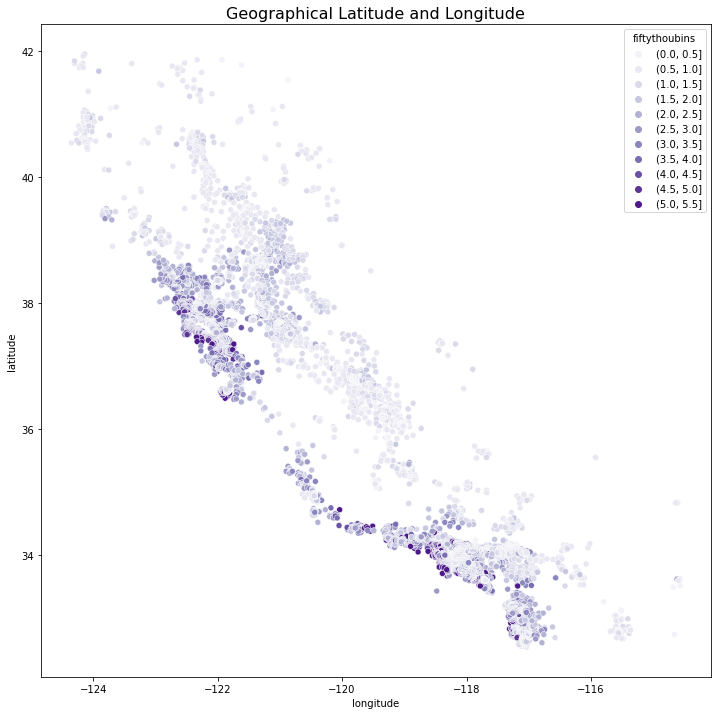

In [68]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df,
                x='longitude',
                y='latitude',
                hue='fiftythoubins',
                palette='Purples'
               )
plt.title('Geographical Latitude and Longitude', fontdict={'fontsize':16})

plt.show()

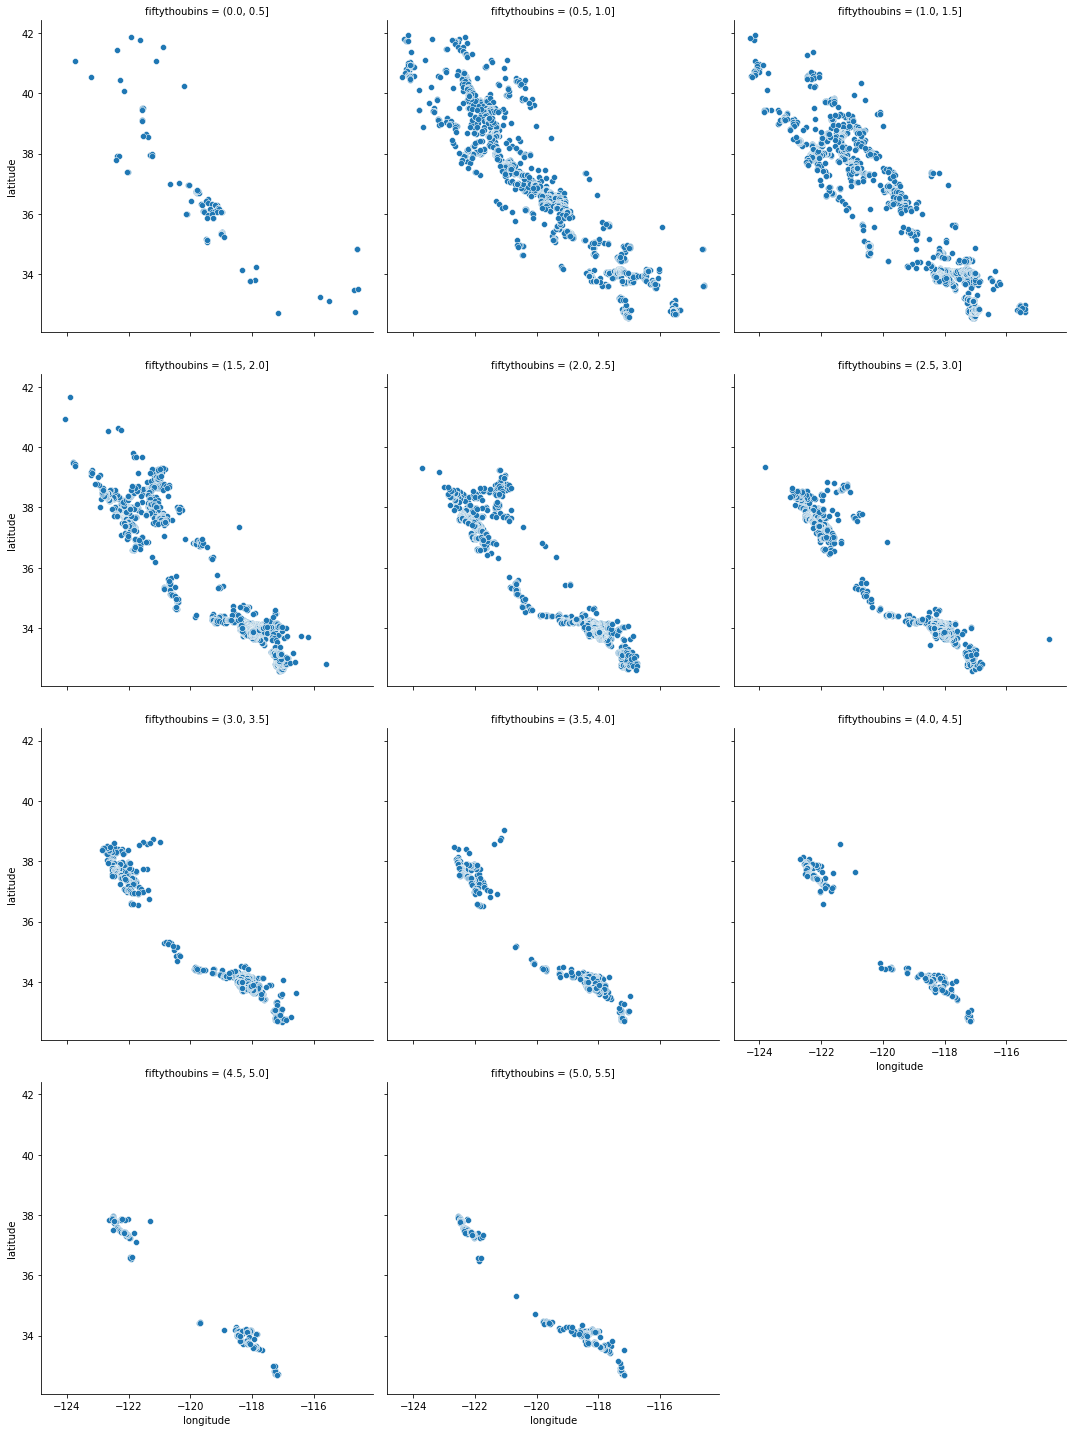

In [70]:
sns.relplot(data=df,
            x='longitude',
            y='latitude',
            col='fiftythoubins',
            col_wrap=3
           )

<Figure size 864x864 with 0 Axes>

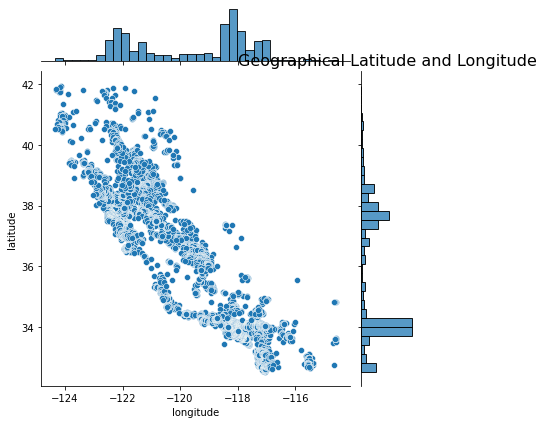

In [46]:
plt.figure(figsize=(12,12))
sns.jointplot(data=df,
                x='longitude',
                y='latitude'
               )
plt.title('Geographical Latitude and Longitude', fontdict={'fontsize':16})

plt.show()

In [26]:
from prepare import split_data_continuous

In [72]:
df.columns

Index(['income', 'house_age', 'rooms', 'bedrooms', 'population', 'occupancy',
       'latitude', 'longitude', 'value', 'value_bins', 'fiftythoubins'],
      dtype='object')

In [74]:
train, validate, test = split_data_continuous(df[['income', 'house_age', 'rooms', 'bedrooms', 'population', 'occupancy',
       'latitude', 'longitude', 'value']])

Prepared df: (16842, 9)

Train: (10104, 9)
Validate: (3369, 9)
Test: (3369, 9)


In [104]:
def scale_data(train, validate, test):
#     Remember incoming columns and index numbers to output DataFrames
    cols = train.columns
    train_index = train.index
    validate_index = validate.index
    test_index = test.index
    
#     Make the scaler
    scaler = MinMaxScaler()
    
#     Use the scaler
    train = scaler.fit_transform(train)
    validate = scaler.transform(validate)
    test = scaler.transform(test)
    
#     Reset the transformed datasets into DataFrames
    train = pd.DataFrame(train, columns= cols, index= train_index)

    validate = pd.DataFrame(validate, columns= cols, index= validate_index)

    test = pd.DataFrame(test, columns= cols, index= test_index)
    
    return train, validate, test
        

### How do different Baseline measures of Mean, Median, Mode, and Harmonic Mean Compare to each other???


In [108]:
# Mean of the Values

# train['baseline'] = \
train.value.mean()

2.015834859461593

In [109]:
# Median of the Values

train.value.median()

1.818

In [118]:
# Mode of Values after rounding to $10,000 increments

train.value.round(1).mode()

0    1.6
Name: value, dtype: float64

In [119]:
# import harmonic mean
from statistics import harmonic_mean

In [124]:
# Mean of Mean, Median, and Mode(rounded)

sum([train.value.mean(), train.value.median(), train.value.round(1).mode()[0]])/3

1.8112782864871975

In [121]:
#  Harmonic mean of Mean, Median, and Mode(rounded)

harmonic_mean([train.value.mean(), train.value.median(), train.value.round(1).mode()[0]])

1.7951952812462149

In [122]:
#  Harmonic mean of the Value column

harmonic_mean(train.value)

1.5016650832649159

In [133]:
# Various methods for baseline predictions
# We'll make new columns for each, and stick them in our training set

train['mean_preds'] = \
train.value.mean()

train['median_preds'] = \
train.value.median()

train['mode_preds'] = \
train.value.round(1).mode()[0]

train['m_mmm_preds'] = \
sum([train.value.mean(), train.value.median(), train.value.round(1).mode()[0]])/3

train['hm_mmm_preds'] = \
harmonic_mean([train.value.mean(), train.value.median(), train.value.round(1).mode()[0]])

train['h_m_total_preds'] = \
harmonic_mean(train.value)

In [127]:
train.columns.tolist()

['income',
 'house_age',
 'rooms',
 'bedrooms',
 'population',
 'occupancy',
 'latitude',
 'longitude',
 'value',
 'baseline',
 'mean_preds',
 'median_preds',
 'mode_preds',
 'm_mmm_preds',
 'hm_mmm_preds',
 'h_m_total_preds']

In [134]:
train

,income,house_age,rooms,bedrooms,population,occupancy,latitude,longitude,value,baseline,mean_preds,median_preds,mode_preds,m_mmm_preds,hm_mmm_preds,h_m_total_preds
17516,5.4273,44.0,5.712000,0.954667,846.0,2.256000,37.33,-121.93,4.210,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
11413,5.3430,17.0,6.318033,1.009836,2585.0,2.825137,33.70,-117.95,2.319,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
13285,4.0375,32.0,5.877483,1.039735,1067.0,3.533113,34.07,-117.68,1.213,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
10179,4.2937,35.0,6.092179,1.036313,1249.0,3.488827,33.86,-117.96,1.832,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
15877,4.2891,52.0,5.099730,1.118598,1442.0,3.886792,37.75,-122.41,2.300,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,2.2866,19.0,4.143885,1.028777,2010.0,3.615108,32.70,-117.03,1.099,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
3681,5.1586,29.0,5.357407,1.005556,1636.0,3.029630,34.21,-118.42,2.374,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
10585,6.8634,24.0,7.183884,0.954545,1593.0,3.291322,33.72,-117.82,2.765,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
14009,6.1309,52.0,6.578199,1.009479,513.0,2.431280,32.75,-117.19,4.116,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665


In [84]:
# #  Set the validate and Test sets to the same baseline from the training set

# validate['baseline'] = train.value.mean()
# test['baseline'] = train.value.mean()

In [154]:
baselines = ['mean_preds',
 'median_preds',
 'mode_preds',
 'm_mmm_preds',
 'hm_mmm_preds',
 'h_m_total_preds']

for i in baselines:
#     print(i)
#     print(train[i][17516])
    validate[i] = train[i][17516]
    test[i] = train[i][17516]

In [144]:
validate

,income,house_age,rooms,bedrooms,population,occupancy,latitude,longitude,value,baseline,mean_preds,median_preds,mode_preds,m_mmm_preds,hm_mmm_preds,h_m_total_preds
3929,4.3654,31.0,5.155556,1.027778,990.0,2.750000,34.19,-118.55,2.23800,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
5910,3.2095,50.0,4.390335,0.985130,1196.0,4.446097,34.29,-118.43,1.67000,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
5788,2.8478,31.0,3.740181,1.021148,605.0,1.827795,34.15,-118.25,2.28100,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
16975,3.3200,40.0,4.548822,1.111111,701.0,2.360269,37.56,-122.31,2.92900,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
17049,7.0001,26.0,6.960165,1.030220,1996.0,2.741758,37.46,-122.26,5.00001,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15804,5.2519,50.0,4.759191,1.045956,945.0,1.737132,37.76,-122.44,3.76600,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
20491,3.5313,15.0,5.306425,1.085667,1390.0,2.289951,34.27,-118.67,1.91800,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
14102,1.6444,16.0,3.217507,1.059682,1505.0,1.996021,32.75,-117.10,1.03400,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665
14985,3.5000,30.0,5.728883,1.051771,2012.0,2.741144,32.74,-117.02,1.44700,2.015835,2.015835,1.818,1.6,1.811278,1.795195,1.501665


In [156]:
# Set the X_cols and y_cols and include the baseline predictions for y

X_cols = ['income',
 'house_age',
 'rooms',
 'bedrooms',
 'population',
 'occupancy',
 'latitude',
 'longitude']
y_cols  = baselines
y_cols.append('value')

In [160]:
X_train = train[X_cols]
y_train = train[y_cols]

X_validate = validate[X_cols]
y_validate = validate[y_cols]

X_test = test[X_cols]
y_test = test[y_cols]

In [101]:
X_train

,income,house_age,rooms,bedrooms,population,occupancy,latitude,longitude
17516,5.4273,44.0,5.712000,0.954667,846.0,2.256000,37.33,-121.93
11413,5.3430,17.0,6.318033,1.009836,2585.0,2.825137,33.70,-117.95
13285,4.0375,32.0,5.877483,1.039735,1067.0,3.533113,34.07,-117.68
10179,4.2937,35.0,6.092179,1.036313,1249.0,3.488827,33.86,-117.96
15877,4.2891,52.0,5.099730,1.118598,1442.0,3.886792,37.75,-122.41
...,...,...,...,...,...,...,...,...
14207,2.2866,19.0,4.143885,1.028777,2010.0,3.615108,32.70,-117.03
3681,5.1586,29.0,5.357407,1.005556,1636.0,3.029630,34.21,-118.42
10585,6.8634,24.0,7.183884,0.954545,1593.0,3.291322,33.72,-117.82
14009,6.1309,52.0,6.578199,1.009479,513.0,2.431280,32.75,-117.19


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10104 entries, 17516 to 10627
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   income      10104 non-null  float64
 1   house_age   10104 non-null  float64
 2   rooms       10104 non-null  float64
 3   bedrooms    10104 non-null  float64
 4   population  10104 non-null  float64
 5   occupancy   10104 non-null  float64
 6   latitude    10104 non-null  float64
 7   longitude   10104 non-null  float64
 8   value       10104 non-null  float64
 9   baseline    10104 non-null  float64
dtypes: float64(10)
memory usage: 868.3 KB


In [161]:
X_train, X_validate, X_test = scale_data(X_train, X_validate, X_test)

In [106]:
X_train

,income,house_age,rooms,bedrooms,population,occupancy,latitude,longitude
17516,0.654328,0.843137,0.573078,0.237354,0.268948,0.322354,0.512903,0.243577
11413,0.643051,0.313725,0.667473,0.385060,0.825072,0.489945,0.122581,0.652621
13285,0.468409,0.607843,0.598854,0.465109,0.339623,0.698419,0.162366,0.680370
10179,0.502682,0.666667,0.632294,0.455947,0.397825,0.685379,0.139785,0.651593
15877,0.502067,1.000000,0.477712,0.676252,0.459546,0.802566,0.558065,0.194245
...,...,...,...,...,...,...,...,...
14207,0.234185,0.352941,0.328830,0.435771,0.641190,0.722564,0.015054,0.747174
3681,0.618383,0.549020,0.517847,0.373600,0.521586,0.550161,0.177419,0.604317
10585,0.846441,0.450980,0.802337,0.237029,0.507835,0.627221,0.124731,0.665982
14009,0.748452,1.000000,0.707996,0.384103,0.162456,0.373968,0.020430,0.730730


<a id="3"> </a>
<div class="alert alert-block alert-info">
</div>

***

### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.
___
[__--TOP--__](#TOP)

In [125]:
from sklearn.metrics import mean_squared_error

In [162]:
baselines

['mean_preds',
 'median_preds',
 'mode_preds',
 'm_mmm_preds',
 'hm_mmm_preds',
 'h_m_total_preds',
 'value']

In [ ]:
baselines.remove('value')

In [163]:
for i in baselines:
    rmse_train = mean_squared_error(y_train.value, y_train[i]) ** 0.5
    rmse_validate = mean_squared_error(y_validate.value, y_validate[i]) ** 0.5

    print(f"RMSE using {i}\nTrain/In-Sample: ", round(rmse_train, 2), 
          "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
y_train

RMSE using mean_preds
Train/In-Sample:  1.06 
Validate/Out-of-Sample:  1.1
RMSE using median_preds
Train/In-Sample:  1.08 
Validate/Out-of-Sample:  1.13
RMSE using mode_preds
Train/In-Sample:  1.14 
Validate/Out-of-Sample:  1.19
RMSE using m_mmm_preds
Train/In-Sample:  1.08 
Validate/Out-of-Sample:  1.13
RMSE using hm_mmm_preds
Train/In-Sample:  1.08 
Validate/Out-of-Sample:  1.13
RMSE using h_m_total_preds
Train/In-Sample:  1.18 
Validate/Out-of-Sample:  1.23


,mean_preds,median_preds,mode_preds,m_mmm_preds,hm_mmm_preds,h_m_total_preds,value
17516,2.015835,1.818,1.6,1.811278,1.795195,1.501665,4.210
11413,2.015835,1.818,1.6,1.811278,1.795195,1.501665,2.319
13285,2.015835,1.818,1.6,1.811278,1.795195,1.501665,1.213
10179,2.015835,1.818,1.6,1.811278,1.795195,1.501665,1.832
15877,2.015835,1.818,1.6,1.811278,1.795195,1.501665,2.300
...,...,...,...,...,...,...,...
14207,2.015835,1.818,1.6,1.811278,1.795195,1.501665,1.099
3681,2.015835,1.818,1.6,1.811278,1.795195,1.501665,2.374
10585,2.015835,1.818,1.6,1.811278,1.795195,1.501665,2.765
14009,2.015835,1.818,1.6,1.811278,1.795195,1.501665,4.116


In [178]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression()#normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train, y_train.value)

# predict train
# 
# use the thing!
# 
y_train['pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.pred_lm) ** (1/2)
# predict validate
y_validate['pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.6374652025766522 
Validation/Out-of-Sample:  0.645218727984531


In [165]:
from sklearn.feature_selection import SelectKBest


In [183]:
best = SelectKBest(f_regression, k=5)

In [184]:
best.fit(X_train, y_train.value)

SelectKBest(k=5, score_func=<function f_regression at 0x12f4f6a60>)

In [185]:
best.get_feature_names_out()

array(['income', 'house_age', 'rooms', 'occupancy', 'latitude'],
      dtype=object)

In [186]:
K_train = X_train[best.get_feature_names_out()]
K_validate = X_validate[best.get_feature_names_out()]

In [187]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression()#normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(K_train, y_train.value)

# predict train
# 
# use the thing!
# 
y_train['K_pred_lm'] = lm.predict(K_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.value, y_train.K_pred_lm) ** (1/2)
# predict validate
y_validate['K_pred_lm'] = lm.predict(K_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.value, y_validate.pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.6949601686696862 
Validation/Out-of-Sample:  0.645218727984531


<a id="NOTES"> </a>
<div class="alert alert-block alert-info">
</div>

***

## Notes:
1. Regularization = "Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting." 
[Towards Data Science](https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea)

2. TweedieRegressor: Requires sklearn v0.23 or greater installed. To update, run in terminal: conda install scikit-learn=0.23

___
[__--TOP--__](#TOP)

# Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>